## Chapter 9 - Clustering Methods

Clustering refers to a broad set of techniques finding subgroups, or clusters in a dataset. When we cluster observations from a dataset, we partition them to distinct groups so the observations within each group are quite similar to each other, while observations across groups are quite different from each other. Consequently, we need to define what is similar or different.

Given $n$ observations, each with $p$ features, we may have a reason to believer there is some heterogeneity among these $n$ observations. Clustering can be used to find these subgroups.

This is an unsupervised learning problem as we attempt to discover structure on the basis of a dataset.

In general, we can cluster either the $n$ observations to identify subgroups among the observations, or the $p$ features to identify subgroups amongst the features. To do the latter, simply transpose the matrix before using any model.

Note that:

- PCA aims to find a low-dimension representation of the observations that explain a good fraction of the variance
- Clustering looks to find homogeneous subgroups amongs the observations.

### k-Means Clustering

$k$-means clustering is a simple and elegant approach to partition a dataset to $k$ distinct, non-overlapping clusters. To perform $k$-means clustering, first specify the desired number of clusters $k$, then the algorithm will assign each observation to one of the $k$ clusters. The assigning of each observation to each cluster $C_1, \cdots, C_k$ such that:
1. $C_1 \cup C_2 \cup C_K = \{i_1,\cdots\ ,i_n\}$. Each observation belongs to at least one of the clusters
2. $C_k \cap C_{k'} = \emptyset \,\,\forall\,\, k \neq k'$. The clusters are non-overlapping

The idea behind $k$-means clustering is that a good clustering is one where the <u>within-cluster variation</u> is as small as possible. The within-cluster variation for a cluster $C_k$, $W(C_k)$ is the amount by which the observations within a cluster differ from each other. 

We hence aim to partition the observations into $K$ clusters such that the total within-cluster variation, summed over $K$ clusters is as small as possible. Mathematically, the optimisation problem is:
$$\underset{C_1, \cdots, C_k}{\text{Minimise }}\left\{\sum_{k=1}^K W(C_k)\right\}$$

The most common choice to define $W$ is the euclidean distance. We attempt to find the sum of all pairwise squared Euclidean distances between the observations in the $k$-th cluster, divided by the total number of observations in the $k$-th cluster.

$$W(C_k) = \frac{1}{|C_k|}\sum_{i\in C_k, i' \in C_k, i\neq i'} \sum_{j=1}^p \begin{pmatrix}x_{ij}-x_{i'j}\end{pmatrix}^2$$
Where $|C_k|$ refers to the number of observations in the $k$-th cluster. 

Combining both equations, we obtain the optimisation problem for $k$-means clustering:

$$\underset{C_1, \cdots, C_k}{\text{Minimise }}\left\{\sum_{k=1}^K \frac{1}{|C_k|}\sum_{i\in C_k, i' \in C_k, i\neq i'} \sum_{j=1}^p \begin{pmatrix}x_{ij}-x_{i'j}\end{pmatrix}^2\right\}$$

The algorithm to solve for this empirically is:
```comments

1. assign a number 1 - K to every observation

2. iterate until cluster assignments stop changing:
    for each cluster 1,...,K:
        A. compute the cluster centroid which is the p-vector that 
        is the means for all observations in the k-th cluster
        
        B. assign each observation to the cluster whose centroid
        is closest
```

When the result no longer changes, a local optimum is reached. Because this algorithm finds a local optimum rather than a global optimum, the results obtained will depend on the initial (random) cluster assignment / initiation in step 1. For this reason, it is important to run the algorithm multiple times from different initialisation points.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Ingest
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
y = pd.Series(iris_dataset['target'])
y_names = pd.Series(iris_dataset['target_names'][i] for i in y)

df = X.join(pd.DataFrame(y_names, columns=['y_name']))

In [3]:
df.y_name.value_counts()

setosa        50
virginica     50
versicolor    50
Name: y_name, dtype: int64

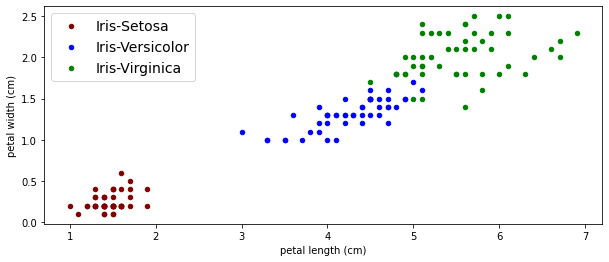

In [4]:
# Scatterplot for only setosa and versicolor
fig, ax = plt.subplots(figsize=(10,4))
df[df.y_name=='setosa'].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=ax, color='maroon')
df[df.y_name=='versicolor'].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=ax, color='blue')
df[df.y_name=='virginica'].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=ax, color='green')
ax.legend(['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'], fontsize=14)
plt.show()

In [5]:
X_ex1 = X[['petal length (cm)', 'petal width (cm)']].copy()

scl1 = StandardScaler()
X_ex1 = scl1.fit_transform(X_ex1)
y_ex1 = y.copy()

# Fit Algorithm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_ex1)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[[-1.30498732 -1.25489349]
 [ 1.02799959  1.12797813]
 [ 0.3058728   0.16541778]]


In [6]:
df_fit = df.copy()
df_fit['y_test'] = y
df_fit['y_predict'] = kmeans.labels_

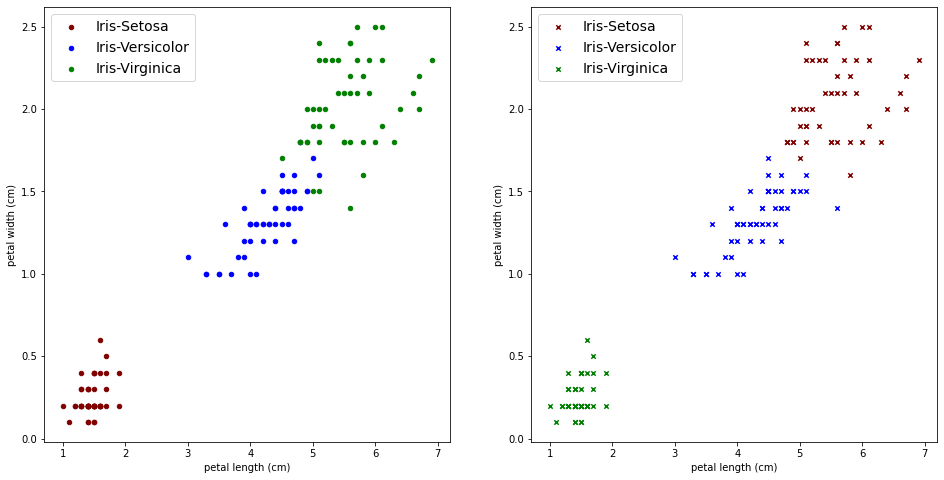

In [7]:
# Scatterplot for all 3 types
fig = plt.figure(figsize=(16,8))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)
df_fit[df_fit.y_test==0].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=ax1, color='maroon')
df_fit[df_fit.y_test==1].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=ax1, color='blue')
df_fit[df_fit.y_test==2].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=ax1, color='green')
ax1.legend(['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'], fontsize=14)

df_fit[df_fit.y_predict==1].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', marker='x', ax=ax2, color='maroon')
df_fit[df_fit.y_predict==2].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', marker='x', ax=ax2, color='blue')
df_fit[df_fit.y_predict==0].plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', marker='x', ax=ax2, color='green')
ax2.legend(['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica'], fontsize=14)
plt.show()

### Issues in Clustering

1. <b>Standardisation</b> - It's important to consider if the features should be standardized in some way before clustering
2. <b>Value of $k$</b> - It's useful to discuss the value of $k$, the number of clusters we wantt to segment the data to

In practice, we usueally try different choices and then look for the one with the most useful or interpretable solution.

1. <b>Validation of Clusters</b> - After clustering is performed, we want to validate if the clusters indeed have meaningful representations or are we clustering the noise.

2. <b>Forcing to a cluster</b> - Clustering algorithms will force each observation to a cluster. However, this might not be appropriate. If some observations indeed are different from all the other observations (outliers) then the clusters might be heavily distorted due to these outliers. Mixture models are an attractive approache to accomomodate the presences of such outliers. 

3. <b>Robustness</b> - Clustering methods are also not very robust when the dataset changes (added or removed). When we obtain one set of clusters for one group of observations, the clusters could sometimes change drastically when we remove or add new observations. 

When we are aware of these considerations / limitations of clustering, we now can go through a set of considerations / checklists before performing clustering and validation of the results. One way to introduce robustness in the algorithm is to perform multiple clustering attempts at subsets of the data (e.g. by bootstrap sampling) and observe the variance of the clusters.

Moreover, it's important to know how to report a clustering analysis. They should not be a conclusion but a step in EDA during unsupervised learning.